# **Space X  Falcon 9 First Stage Landing Prediction**

## Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   Here we will create a machine learning pipeline  to predict if the first stage will land or not.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)

Several examples of an unsuccessful landing are shown here:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)

## Import Libraries and Define Auxiliary Functions

In [114]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
#For plotting ROC curve
from sklearn.metrics import RocCurveDisplay
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
#Accuracy_score gives the accuracy of each method
from sklearn.metrics import accuracy_score,classification_report
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split,GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
#For saving our model
import pickle
#To save the optimal model

# This function is to plot the confusion matrix for the project.

In [46]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [47]:
## Load the dataframe

In [48]:
data = pd.read_csv('C:/Users/JAAME/OneDrive/Desktop/Space-X/dataset_falcon9.csv')
data.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


## only the column LandingPad has missing values

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

### we can explore dataset to get some insights by separating succesuful and unsuccessful records

In [50]:
data_success = data[data['Class']==1]

In [51]:
data_fail = data[data['Class']!=1]

In [52]:
data_success['Class'].unique()

array([1])

In [53]:
data_fail['Class'].unique()

array([0])

In [54]:
data_success.shape

(60, 18)

In [55]:
data_fail.shape

(30, 18)

### The Orbit column indicates the target orbital destination of Falcon 9 launches

In [56]:
data_success['Orbit'].value_counts()

Orbit
GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
HEO       1
GEO       1
Name: count, dtype: int64

In [57]:
data_fail['Orbit'].value_counts()

Orbit
GTO     13
ISS      8
PO       3
LEO      2
VLEO     2
MEO      1
SO       1
Name: count, dtype: int64

### LaunchSite represents the location where the rocket is launched from

In [58]:
data_success['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    33
KSC LC 39A      17
VAFB SLC 4E     10
Name: count, dtype: int64

In [59]:
data_fail['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    22
KSC LC 39A       5
VAFB SLC 4E      3
Name: count, dtype: int64

### Reused indicates whether the rocket's first stage had been used for a particular launche

In [60]:
data_success['Reused'].value_counts()

Reused
False    31
True     29
Name: count, dtype: int64

In [61]:
data_fail['Reused'].value_counts()

Reused
False    22
True      8
Name: count, dtype: int64

### The values in the 'GridFins' column indicate whether the Falcon 9 rocket's grid fins were deployed during the mission.Grid fins are used for aerodynamic control during the rocket's descent back to Earth after launch. 

In [62]:
data_success['GridFins'].value_counts()

GridFins
True     58
False     2
Name: count, dtype: int64

In [63]:
data_fail['GridFins'].value_counts()

GridFins
False    18
True     12
Name: count, dtype: int64

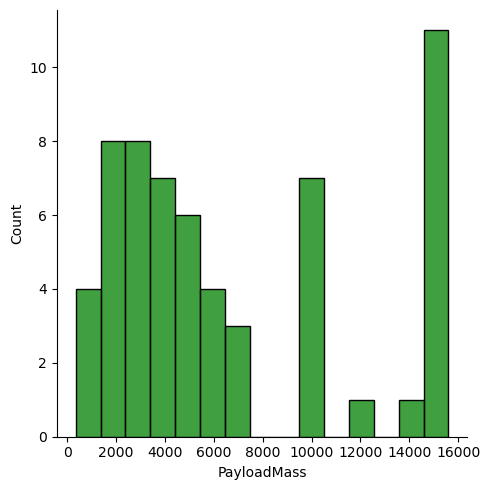

In [64]:
sns.displot(data_success['PayloadMass'],color="green",bins=15)

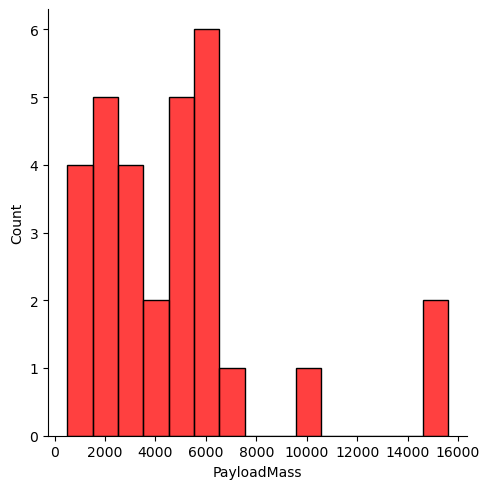

In [65]:
sns.displot(data_fail['PayloadMass'],color="red",bins=15)

In [66]:
data['BoosterVersion']

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [67]:
data['BoosterVersion'].unique()

array(['Falcon 9'], dtype=object)

In [68]:
data['FlightNumber'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90])

In [69]:
data['Date'].unique()

array(['2010-06-04', '2012-05-22', '2013-03-01', '2013-09-29',
       '2013-12-03', '2014-01-06', '2014-04-18', '2014-07-14',
       '2014-08-05', '2014-09-07', '2014-09-21', '2015-01-10',
       '2015-02-11', '2015-04-14', '2015-04-27', '2015-06-28',
       '2015-12-22', '2016-01-17', '2016-03-04', '2016-04-08',
       '2016-05-06', '2016-05-27', '2016-07-18', '2016-08-14',
       '2016-09-01', '2017-01-14', '2017-02-19', '2017-03-16',
       '2017-03-30', '2017-05-01', '2017-05-15', '2017-06-03',
       '2017-06-23', '2017-06-25', '2017-07-05', '2017-08-14',
       '2017-08-24', '2017-09-07', '2017-10-09', '2017-10-11',
       '2017-10-30', '2017-12-15', '2017-12-23', '2018-01-08',
       '2018-01-31', '2018-03-06', '2018-03-30', '2018-04-02',
       '2018-04-18', '2018-05-11', '2018-06-04', '2018-06-29',
       '2018-07-22', '2018-07-25', '2018-08-07', '2018-09-10',
       '2018-10-08', '2018-11-15', '2018-12-03', '2018-12-05',
       '2018-12-23', '2019-01-11', '2019-03-02', '2019-

After analyzing the dataset, we determined that columns like BoosterVersion, FlightNumber, Date, Longitude, and Latitude are not useful for prediction.
Longitude and Latitude correspond to the launch site’s geographical coordinates and don’t directly impact the launch success.
BoosterVersion is redundant since all entries are "Falcon 9".
Date and FlightNumber don’t significantly influence the launch outcome and are not strong predictors.
Therefore, we can remove these columns to simplify the dataset and reduce the risk of overfitting

In [70]:
data=data.drop(['FlightNumber','Date','BoosterVersion','Longitude','Latitude'],axis=1)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(5)
memory usage: 7.4+ KB


In order to apply machine learning methods, it’s essential to convert all object (categorical) data types into numeric values, as most algorithms require numerical input.For this, we can use dummy variables to represent categorical variables as binary columns. For example, columns like  Orbit, LaunchSite, and Outcome are of the object data type, so we will convert them into numeric values using dummy variables.

In the LandingPad column, there are missing values. Since we don’t want to lose any information or rows from our dataset, we retain these rows.
When we apply dummy encoding, the rows with missing values will simply be represented as all zeros in the dummy variables, indicating that no specific LandingPad was associated with that record. This way, we can preserve the rows without introducing any biases or losing valuable data

In [72]:
data_dummy= pd.get_dummies(data[['Orbit','LaunchSite','Outcome','LandingPad','Serial']]).astype(int)

In [73]:
data_dummy.head(5)

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### For boolean columns, we convert their data type as follows:

In [74]:
data['GridFins']=data['GridFins'].astype(int)
data['Reused']=data['Reused'].astype(int)
data['Legs']=data['Legs'].astype(int)

In [75]:
data[['GridFins','Legs','Reused']][10:15]

,GridFins,Legs,Reused
10,0,0,0
11,1,1,0
12,1,1,0
13,1,1,0
14,0,0,0


### now we just need to eliminate 'Orbit','LaunchSite','Outcome','LandingPad' and 'Serial' columns from 'data' dataset and then concatenate our two datsets , data and data_dummy

In [76]:
data=data.drop(['Orbit','LaunchSite','Outcome','LandingPad','Serial'],axis=1)

In [77]:
data = pd.concat([data, data_dummy], axis=1)

In [78]:
data.head(5)

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int64  
 9   Orbit_GEO                            90 non-null     int64  
 10  Orbit_GTO                            90 non-null     int64  
 11  Orbit_HEO                         

### Saving preprocessed data

In [80]:
data.to_csv("C:/Users/JAAME/OneDrive/Desktop/Space-X/preprocessed_data.csv")

## Now that the data preprocessing is complete and our dataset is ready, we can begin applying Machine learning methods to make predictions and derive insights

## Defining x and y

In [81]:
x=data.drop('Class',axis=1)
y=data['Class']

In [82]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(x)
x_scaled

array([[-1.94814463e-16, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.19523159e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.16267307e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.99100483e+00,  3.49060516e+00,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.99100483e+00,  1.00389436e+00,  5.34522484e-01, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [-5.19213966e-01, -6.53912840e-01,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [83]:
col=x.columns
x = pd.DataFrame(x_scaled, columns=col)
x.head(5)

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.97344,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106
1,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.97344,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106
2,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.97344,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106
3,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.97344,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106
4,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.97344,-0.106,-0.106,1.527525,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106


### Train-Test split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

#### Definig two empty list to append all methods accuracies and names to them

In [85]:
accuracy=[]
method=[]

# Logistic regression

I chose the following hyperparameters based on common practices and to tune the Logistic Regression model effectively

C: The regularization strength. I tested values [0.01, 0.1, 1] to balance between underfitting (high regularization) and overfitting (low regularization).

penalty: I used L2 (Ridge) regularization, which helps reduce the impact of large coefficients and prevents overfitting.

solver: I selected 'lbfgs' as the optimization algorithm, which works well with L2 regularization

In [86]:
lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=5)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [87]:
print(logreg_cv.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [88]:
yhat=logreg_cv.predict(x_test)

In [89]:
accuracy.append(accuracy_score(y_test,yhat))
method.append("Logistic regression")
accuracy_score(y_test,yhat)

0.8888888888888888

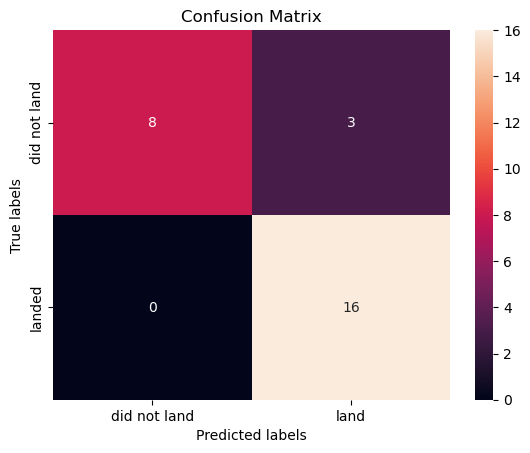

In [90]:
plot_confusion_matrix(y_test,yhat)
# TN=8 , FN=0 , TP=16 , FP=3

# Decision Tree

In [91]:
tree = DecisionTreeClassifier(random_state=101)

#### hyperparameters parameters for decision Tree method

In [92]:
parameters = {'criterion': ['gini', 'entropy'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [93]:
tree_cv = GridSearchCV(tree, parameters,cv=5)

In [94]:
tree_cv.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [95]:
print(tree_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [96]:
yhat_1=tree_cv.predict(x_test)

In [97]:
accuracy.append(accuracy_score(y_test,yhat_1))
method.append("Decesion Tree")
accuracy_score(y_test,yhat_1)

0.8148148148148148

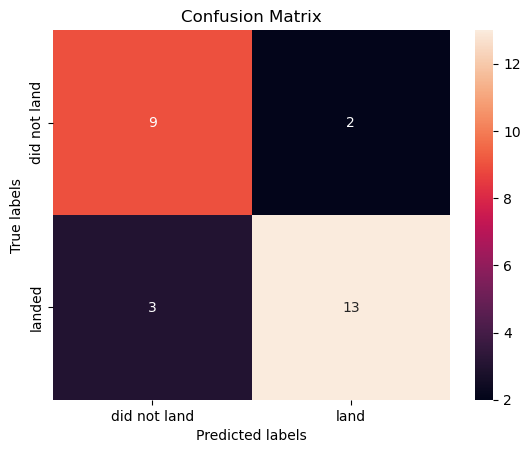

In [98]:
plot_confusion_matrix(y_test,yhat_1)

# K Nearest Neighbors

In [99]:
KNN = KNeighborsClassifier()

In [100]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


In [101]:
knn_cv = GridSearchCV(KNN, parameters, cv = 5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [102]:
print(knn_cv.best_params_)

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}


In [103]:
yhat_2=knn_cv.predict(x_test)

In [104]:
accuracy.append(accuracy_score(y_test,yhat_2))
method.append("k Nearest Neighbors")
accuracy_score(y_test,yhat_2)

0.8518518518518519

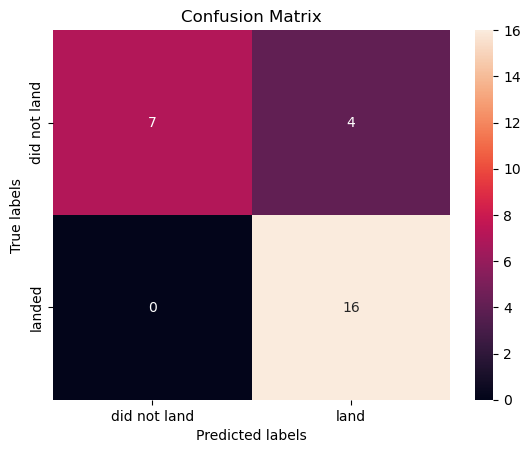

In [105]:
plot_confusion_matrix(y_test,yhat_2)

# Comparing models accuracuies

In [106]:
print(accuracy)
print(method)

[0.8888888888888888, 0.8148148148148148, 0.8518518518518519]
['Logistic regression', 'Decesion Tree', 'k Nearest Neighbors']


### Logistic Regression method has the highest accuracy

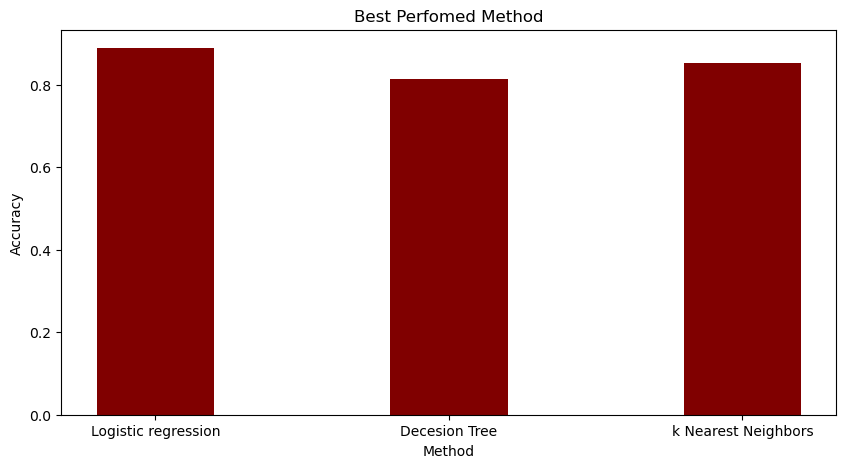

In [117]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(method, accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

# ROC Curve

### ROC reflects the model’s ability to distinguish between classes across thresholds.

#### Logistic Regression (AUC = 0.91) → Excellent performance
#### Decision Tree (AUC = 0.84) → Good
#### KNN (AUC = 0.82) → Good, slightly worse than Tree

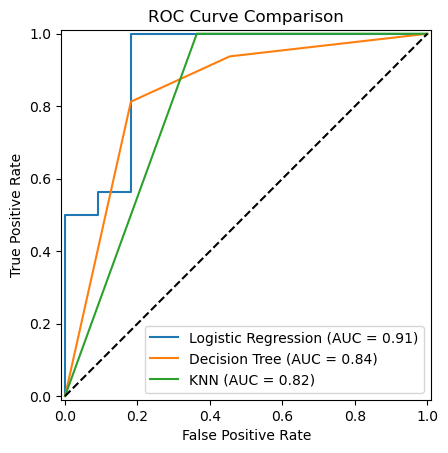

In [108]:
models = {
    'Logistic Regression':logreg_cv ,
    'Decision Tree': tree_cv,
    'KNN': knn_cv
}

# Loop through each model and plot the ROC curve on the same plot
for model_name, model in models.items():
    RocCurveDisplay.from_estimator(model, x_test, y_test, name=model_name, ax=plt.gca())

# Add diagonal line (random classifier baseline)
plt.plot([0, 1], [0, 1], color='Black', linestyle='--')
# Add labels, title, and legend
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()

## Comparing other metrics(precision, recall ,f1_score) to choose optimal model

#### Logistic regression

In [110]:
print(classification_report(y_test,yhat))  

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.84      1.00      0.91        16

    accuracy                           0.89        27
   macro avg       0.92      0.86      0.88        27
weighted avg       0.91      0.89      0.88        27



#### Decision Tree 

In [111]:
print(classification_report(y_test,yhat_1))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.87      0.81      0.84        16

    accuracy                           0.81        27
   macro avg       0.81      0.82      0.81        27
weighted avg       0.82      0.81      0.82        27



#### K Nearest Neighbors

In [112]:
print(classification_report(y_test,yhat_2))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.80      1.00      0.89        16

    accuracy                           0.85        27
   macro avg       0.90      0.82      0.83        27
weighted avg       0.88      0.85      0.84        27



##### Logistic regreesion has 0.89 accuracy , 91% precision and 89% recall
##### Decision Tree has 81% accuracy , 82% precision , and 81% recall
##### K Nearest Neighbor has 85% accuracy , 88% precision and 85% recall

### Among all evaluated models, Logistic Regression achieved the highest performance across all key metrics such as accuracy, precision, recall, and ROC–AUC.
### Due to its strong predictive capability, stability, and interpretability, Logistic Regression is selected as the final model for deployment.

# Finally saving our optimal model in order to use for deployment and make conclusion

In [118]:
pickle.dump(logreg_cv, open("optimal_logistic.pkl", "wb"))

# conclusion

In this project, we explored the classification problem of predicting whether the first stage of a SpaceX Falcon 9 rocket will successfully land.
After comprehensive data preprocessing,including handling categorical and boolean variables,we trained and evaluated multiple machine
learning models such as Logistic Regression, K-Nearest Neighbors and Decision Tree

Among all the models, Logistic Regression demonstrated the best overall performance across key metrics including accuracy, precision, recall,
F1-score, and ROC-AUC, making it the most suitable choice for deployment. Its simplicity, interpretability, and robust predictive capability
make it a reliable model for this task.

This notebook concludes with saving the optimal model for deployment. The project showcases a  machine learning pipeline,from data analysis
and model development to evaluation and deployment readiness.